In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
#load th e MNIST Datasets
(X_train, y_train),(X_test,y_test) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Precprocess the dataset
X_train = X_train.reshape((-1,28,28,1))/255.0
X_test = X_test.reshape((-1,28,28,1))/255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense


In [5]:
# Build the CNN model
model = Sequential([
    Conv2D(32,(3, 3), activation = 'relu', input_shape = (28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [6]:
# compile and train the model
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=128, epochs=10,validation_data=(X_test,y_test))


Epoch 1/10
469/469 [==============================] - 17s 35ms/step - loss: 0.2517 - accuracy: 0.9248 - val_loss: 0.0773 - val_accuracy: 0.9761
Epoch 2/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0654 - accuracy: 0.9804 - val_loss: 0.0480 - val_accuracy: 0.9848
Epoch 3/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0452 - accuracy: 0.9865 - val_loss: 0.0388 - val_accuracy: 0.9872
Epoch 4/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0357 - accuracy: 0.9892 - val_loss: 0.0361 - val_accuracy: 0.9874
Epoch 5/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.0363 - val_accuracy: 0.9880
Epoch 6/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 0.0325 - val_accuracy: 0.9891
Epoch 7/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0262 - val_accuracy:

In [7]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test,y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

313/313 [==============================] - 2s 5ms/step - loss: 0.0321 - accuracy: 0.9900
Test Loss: 0.0321
Test Accuracy: 0.9900


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Select random images from the test
random_indexes = np.random.choice(len(X_test), size = 5, replace=False)
images = X_test[random_indexes]
true_labels = np.argmax(y_test[random_indexes], axis=1)



In [10]:
#Make Predictions using the trained model
predictions = np.argmax(model.predict(images), axis=1)


1/1 [==============================] - 0s 138ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

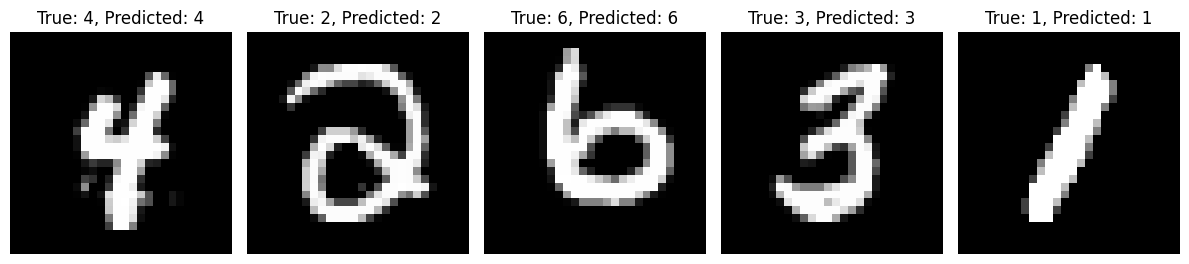

In [11]:
fig, axes = plt.subplots(1,5, figsize=(12,4))
for i, (image,true_label,predicted_label) in enumerate(zip(images, true_labels, predictions)):
    axes[i].imshow(image.squeeze(), cmap='gray')
    axes[i].set_title(f'True: {true_label}, Predicted: {predicted_label}')
    axes[i].axis('off')
    
plt.tight_layout()
plt.show